In [6]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import glob
import random
import ntpath

In [7]:
class Board():
    """ Use this class to ...
    
    Args:
        dict_images <dict>: images, pairly packed in dict for ...
        ...
    """
    def __init__(self, dict_images={}, limit=40, phs_in_row=4, get_randomly=False, c=3):
        self.dict_images = dict_images
        self.limit = limit
        self.phs_in_row = phs_in_row
        self.get_randomly = get_randomly
        self.stratch_factor = c
    
    def unpack_dict(self):
        """ This function represents ...
        """
        if self.get_randomly == True:
            list_dict = list(self.dict_images.items())
            random.shuffle(list_dict)
            self.dict_images = dict(list_dict)
        
        self.names = list(self.dict_images.keys())[:self.limit] # обрезать по лимиту
        self.images = list(self.dict_images.values())
        
    def net(self):
        """ TODO
        """
        n = len(self.names)
        
        assert n != 0, "Folder is empty"  # TODO: think about exceptions if columns more then photos
        
        lines_mod = divmod(2*n, 2*self.phs_in_row)
        lines = lines_mod[0]  # number of rows
        phs_left = lines_mod[1]  # количество фото в неполной строке
        
        if phs_left == 0:
            fig, axs = plt.subplots(
                lines, 2*self.phs_in_row,
                figsize=(self.stratch_factor*2*self.phs_in_row, self.stratch_factor*(lines+1))
            )  # добавить потом условия про остаток
        
        else:
            fig, axs = plt.subplots(
                lines+1, 2*self.phs_in_row,
                figsize=(self.stratch_factor*2*self.phs_in_row, self.stratch_factor*(lines+1))
            )
        
        k = 0
        
        if (lines > 1) or ((lines == 1) and (phs_left != 0)):
            for i in range(lines):
                for j in range(0, 2*self.phs_in_row, 2):
                    axs[i, j].imshow(self.images[k][0])
                    axs[i, j].set_title(
                        self.names[k], loc="left",
                        fontsize=12, fontweight="regular", pad=15
                    )
                    axs[i, j+1].imshow(self.images[k][1])
                    
                    k += 1
                    j += 1
                            
            if phs_left != 0:  # достраиваем оставшиеся фото в неполной строке
            
                # номер первого подграфика в последней неполной строке или число пустых подграфиков перед первым фото
                first_subplot_number = int((2*self.phs_in_row - phs_left)/2)
                # номер первого пустого после построенных в той же строке
                first_empty_number = first_subplot_number + phs_left
                
                for j in range(first_subplot_number, first_empty_number, 2):
                    axs[lines, j].imshow(self.images[k][0])
                    axs[lines, j].set_title(self.names[k], loc='left', fontsize=12, fontweight="regular", pad=15)
                    axs[lines, j+1].imshow(self.images[k][1])
                    k += 1
                    j += 1
                    
        elif (lines == 1) & (phs_left == 0):
            for j in range(0, 2*self.phs_in_row, 2):
                axs[j].imshow(self.images[k][0])
                axs[j].set_title(self.names[k], loc="left", fontsize=12, fontweight="regular", pad=15)
                axs[j+1].imshow(self.images[k][1])
                k += 1
                j += 1
                 
        elif lines == 0:
            for j in range(0, 2*n, 2):
                axs[j].imshow(self.images[k][0])
                axs[j].set_title(self.names[k], loc="left", fontsize=12, fontweight="regular", pad=15)
                axs[j+1].imshow(self.images[k][1])
                k += 1
                j += 1
       
        for axs in axs.flat:  # убираем оси и рамку на всех подграфиках
            axs.set(xticks=[], yticks=[])
            axs.set_frame_on(False)
                
        plt.show()

In [8]:
folder_origin = glob.glob('/Users/alexander/Documents/original/*') #список с путями
folder_new = glob.glob('/Users/alexander/Documents/model/*')
img_origin = []
img_new = []
names = []
 
for i in range(len(folder_origin)):
    img_origin.append(np.array(PIL.Image.open(folder_origin[i]))) 
    img_new.append(np.array(PIL.Image.open(folder_new[i])))
    head, tail = ntpath.split(folder_origin[i])
    names.append(tail)

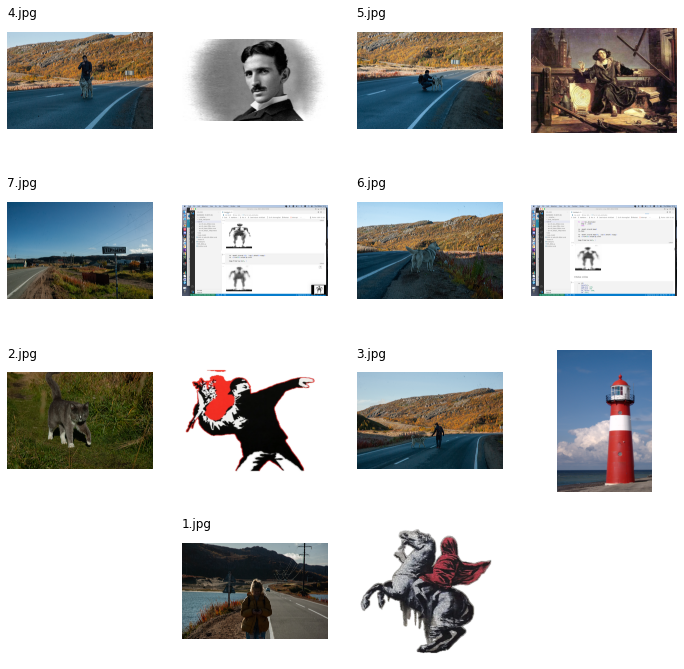

In [9]:
dictionary = {names[i]: (img_origin[i], img_new[i]) for i in range(len(names))}
board = Board(dictionary, phs_in_row=2)
board.unpack_dict()
board.net()

# TODOs:

- Посмотри отличие от того как я твой код отредактил и как было у тебя
- Нужно чтобы без флага random файлы шли в алфавитном порядке
- Сделай таблицу с loss'ами